<br><font face = "Times New Roman" size = "4"> <b>Name: Sankul Pandey  DS0722
<br><font face = "Times New Roman" size = "4"> <b>Email: sankul99@gmail.com
    
    
    
    
    


<br><font face = "Muller Text" size = "8"> <b> Loan Application Status Prediction 
    
    
    
    

<br><font face = "TImes New Roman" size = "5"> <b> Problem Statement


<br><font face = "TImes New Roman" size = "4"> <b> Description

This dataset includes details of applicants who have applied for loan. The dataset includes 
details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2. Gender - This refers to either of the two main categories (male and female) into which 
applicants are divided on the basis of their reproductive functions
3. Married - This refers to applicant being in a state of matrimony
4. Dependents - This refres to persons who depends on the applicants for survival
5. Education - This refers to number of years in which applicant received systematic 
instruction, especially at a school or university
6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner 
of a business rather than for an employer
7. Applicant Income - This refers to disposable income available for the applicant's use 
under State law.
8. CoapplicantIncome - This refers to disposable income available for the people that 
participate in the loan application process alongside the main applicant use under State 
law.
9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the 
applicant
11. Credit History - This refers to a record of applicant's ability to repay debts and 
demonstrated responsibility in repaying them.
12. Property_Area - This refers to the total area within the boundaries of the property as set 
out in Schedule.
13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan 
requested.
You have to build a model that can predict whether the loan of the applicant will be 
approved(Loan_status) or not on the basis of the details provided in the dataset

<br><font face = "TImes New Roman" size = "4"> <b> Dataset Link

https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

# 1) Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# 2) Importing Data 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 3) Checking Columns, Datatypes and Shapes

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can observe from the above that the particular dataset has majority of the data in the form of objects and float64. 
One particular column has integer values. 

In [6]:
df.shape

(614, 13)

# 4) Checking For Empty Spaces and Null Values 

In [7]:
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Cred

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

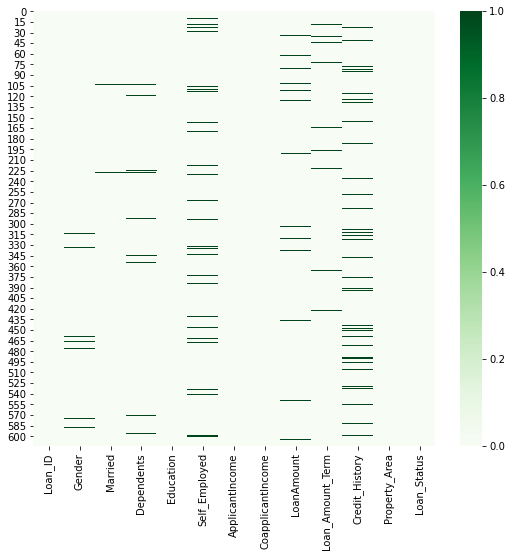

In [9]:
plt.figure(figsize=(9,8))
sns.heatmap(df.isnull(),cmap='Greens')

After going through the steps from above we have come to this conclusion that the dataset clearly has some null values. We can deal with the null values in two ways

1. We can either remove or drop these null values from the dataset 
2. We can use an imputer and impute data. This will fill the data that has null values using some techniques. 

# 5) Imputing The Null Values In The Dataset 

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
impute_int=SimpleImputer(strategy='mean')
impute_object=SimpleImputer(strategy='most_frequent')

In [12]:
list_int=['LoanAmount','Loan_Amount_Term']
list_object=['Gender','Married','Dependents','Self_Employed','Credit_History']

In [13]:
for i in list_int:
    df[i]=impute_int.fit_transform(df[i].values.reshape(-1,1))
for i in list_object:
    df[i]=impute_object.fit_transform(df[i].values.reshape(-1,1))

<AxesSubplot:>

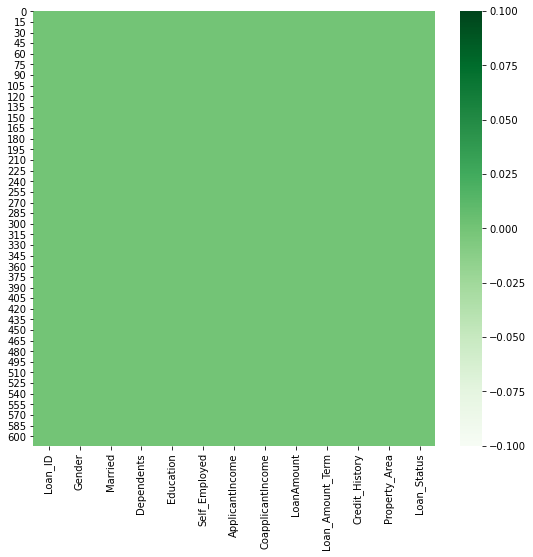

In [14]:
#Now checking if the null values are removed or not using a heatmap again

plt.figure(figsize=(9,8))
sns.heatmap(df.isnull(),cmap='Greens')

We can see from the above heatmap that all the possible null values have been removed

# 6) Checking Uniques & Duplicates 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
dupli = df[df.duplicated()]
print("All the Duplicate Rows are: ")

dupli

All the Duplicate Rows are: 


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [17]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

We can observe from the above part of the analysis is that

1. After using the imputer the dataset has no more null values 
2. There are no duplicate rows in this particular dataset 
3. Each column has amounts of unique values 
4. Loan_id , ApplicantIncome, CoapplicantIncome, LoanAmount have most amount of unique values present

# 7) EDA Analysis 

We will go through each column individually and perform basic visual analysis to get a better understanding of each columns and the dataset as a whole 

### Loan_ID

Loan_ID for the dataset is the primary key of the following dataset meaning Loan_ID contains unique values that identifies each and every column that is present in the dataset. This particular column of the dataset is thus not important to our analysis and can be removed

In [18]:
df=df.drop(['Loan_ID',],axis=1)

### Gender

In [19]:
df['Gender'].describe()

count      614
unique       2
top       Male
freq       502
Name: Gender, dtype: object

In [20]:
df['Gender'].isnull().sum()

0

In [21]:
#Checking Uniques

print(df['Gender'].unique())
print(df['Gender'].value_counts())

['Male' 'Female']
Male      502
Female    112
Name: Gender, dtype: int64


The Males are in the majority here compared to females

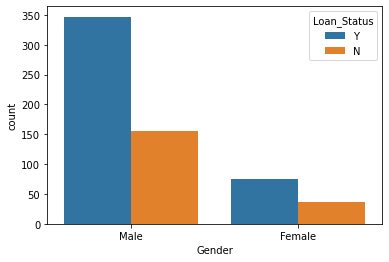

In [22]:
sns.countplot('Gender',data=df,hue='Loan_Status');

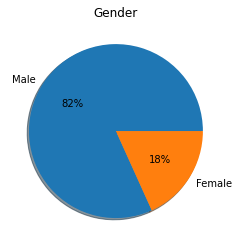

In [23]:
label=df['Gender'].unique()
y=df['Gender'].value_counts()

plt.title('Gender')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

1. 82% are male and 18% are female 
2. Gender Data is Object type therefore we will be needing to encode the data to a form that is understandable for the Machine Learning models.

In [24]:
df['Gender']=df['Gender'].replace('Female',0)
df['Gender']=df['Gender'].replace('Male',1)

### Married 

In [25]:
df['Married'].describe()

count     614
unique      2
top       Yes
freq      401
Name: Married, dtype: object

In [26]:
df['Married'].isnull().sum()

0

In [27]:
print(df['Married'].unique())
print(df['Married'].value_counts())

['No' 'Yes']
Yes    401
No     213
Name: Married, dtype: int64


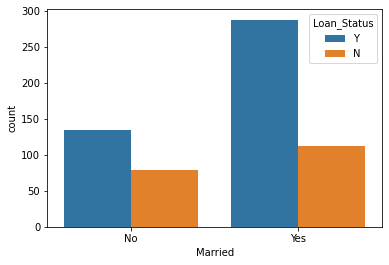

In [28]:
sns.countplot('Married',data=df,hue='Loan_Status');

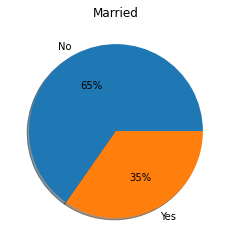

In [29]:
label=df['Married'].unique()
y=df['Married'].value_counts()

plt.title('Married')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

1. 65% Who are on Loan list are not married
2. 35% are married 
3. Married column also has data type as Object so we will be needing encoding for this particular column too 

In [30]:
df['Married']=df['Married'].replace('No',0)
df['Married']=df['Married'].replace('Yes',1)

### Dependents 

In [31]:
df['Dependents'].describe()

count     614
unique      4
top         0
freq      360
Name: Dependents, dtype: object

In [32]:
df['Dependents'].isnull().sum() 

0

In [33]:
print(df['Dependents'].unique())
print(df['Dependents'].value_counts())

['0' '1' '2' '3+']
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


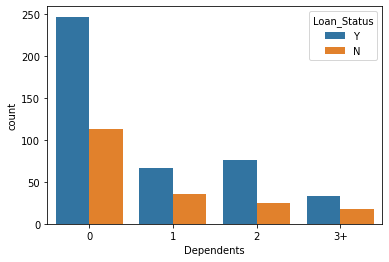

In [34]:
sns.countplot('Dependents',data=df,hue='Loan_Status');

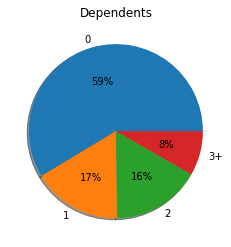

In [35]:
label=df['Dependents'].unique()
y=df['Dependents'].value_counts()

plt.title('Dependents')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

1. 59% 0 Dependents
2. 17% 1 Dependent
3. 16% 2 Dependents
4. 8% 3 or more Dependents
5. We can see in the unique value for this particular column that the a certain series is being followed so we can undergo Label encoding here instead of the basic encoding technique

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
labe= LabelEncoder ()

In [38]:
df["Dependents"] = labe.fit_transform(df[ 'Dependents'])

### Education 

In [39]:
df['Education'].describe() 

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

In [40]:
df['Education'].isnull().sum()

0

In [41]:
print(df['Education'].unique())
print(df['Education'].value_counts())

['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


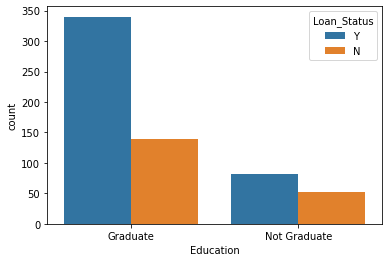

In [42]:
sns.countplot('Education',data=df,hue='Loan_Status');

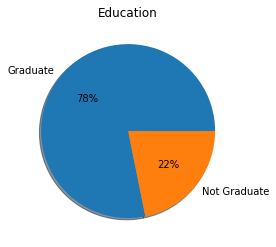

In [43]:
label=df['Education'].unique()
y=df['Education'].value_counts()

plt.title('Education')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

1. 78% are educated on the loan status 
2. 22% are non educated on the loan status 
3. Object data type so we will have to undergo encoding here as well 

In [44]:
df["Education"] = labe.fit_transform(df[ 'Education'])

### Self_Employed

In [45]:
df['Self_Employed'].describe() 

count     614
unique      2
top        No
freq      532
Name: Self_Employed, dtype: object

In [46]:
df['Self_Employed'].isnull().sum()

0

In [47]:
print(df['Self_Employed'].unique())
print(df['Self_Employed'].value_counts())

['No' 'Yes']
No     532
Yes     82
Name: Self_Employed, dtype: int64


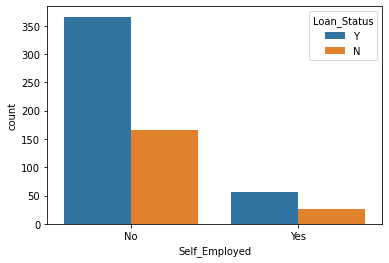

In [48]:
sns.countplot('Self_Employed',data=df,hue='Loan_Status');

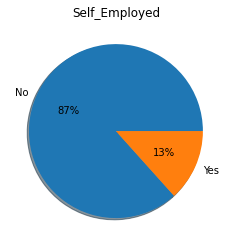

In [49]:
label=df['Self_Employed'].unique()
y=df['Self_Employed'].value_counts()

plt.title('Self_Employed')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

1. 87% on the loan status are not self employed
2. 13% on the loan status are self employed
3. Encoding needs to be done for the data to be understandable for the ML models

In [50]:
df['Self_Employed']=df['Self_Employed'].replace('No',0)
df['Self_Employed']=df['Self_Employed'].replace('Yes',1)

### ApplicantIncome

In [51]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [52]:
df['ApplicantIncome'].isnull().sum()

0

In [53]:
print(df['ApplicantIncome'].unique())
print(df['ApplicantIncome'].value_counts())

[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538  2980  1863  7933  3089  4167
  9323  3707  2439  2237  8000  1820 51763  3522  5708  4344  3497  2045
  5516  6400  1916  4600 33846  3625 39147  2178  2

In [54]:
df['ApplicantIncome'].skew()

6.539513113994625

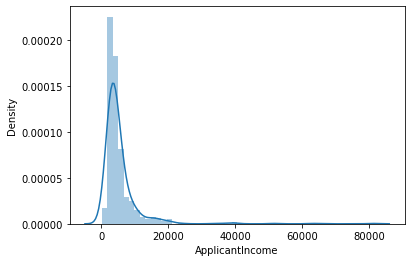

In [55]:
plt.plot()
sns.distplot(df['ApplicantIncome']) 
plt.show()

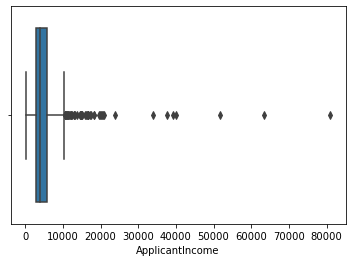

In [56]:
plt.plot()
sns.boxplot(df['ApplicantIncome'])
plt.show()

We can observe in this particular column that 

1. data is skewed so we have to remove that skewness 
2. some otuliers are present so we have to remove them too

In [57]:
logt=np.log(df["ApplicantIncome"])

In [58]:
dff = df.copy()

In [59]:
df["ApplicantIncome"]=logt

In [60]:
print("Skewness after trying to remove the skewness is ", logt.skew())

Skewness after trying to remove the skewness is  0.4795799780016222


### Coapplicantincome

In [61]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [62]:
df['CoapplicantIncome'].isnull().sum()

0

In [63]:
df['CoapplicantIncome'].skew()

7.491531216657306

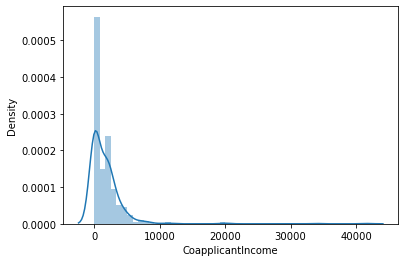

In [64]:
plt.plot()
sns.distplot(df['CoapplicantIncome']) 
plt.show()

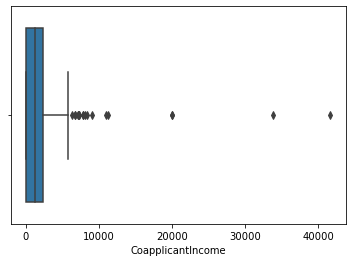

In [65]:
plt.plot()
sns.boxplot(df['CoapplicantIncome'])
plt.show()

Data is skewed in this case similar to the previous column of applicant income so we will have to remove this as well

In [66]:
from sklearn.preprocessing import power_transform,PowerTransformer

In [67]:
x=power_transform(df[["CoapplicantIncome"]], method='yeo-johnson')

In [68]:
df["CoapplicantIncome"]=x

In [69]:
print("Skewness of the data is: ", df["CoapplicantIncome"].skew())

Skewness of the data is:  -0.14564645710551902


### LoanAmount

In [70]:
df['LoanAmount'].describe()

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [71]:
df['LoanAmount'].isnull().sum()

0

In [72]:
df['LoanAmount'].skew()

2.726601144105299

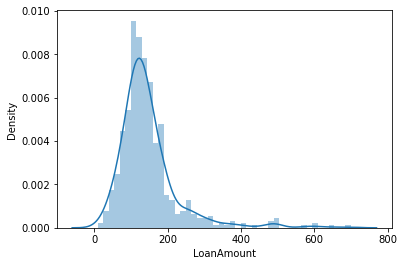

In [73]:
plt.plot()
sns.distplot(df['LoanAmount'])
plt.show()

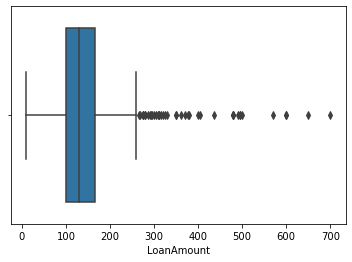

In [74]:
plt.plot()
sns.boxplot(df['LoanAmount'])
plt.show()

Data is skewed in this case. We will have to remove this 

In [75]:
LA =np.sqrt(df["LoanAmount"])
df['LoanAmount'] = LA

In [76]:
print("Skewness of the data is: ", df["LoanAmount"].skew())

Skewness of the data is:  1.3141619498030808


### Loan_Amount_Term 

In [77]:
df['Loan_Amount_Term'].describe()

count    614.000000
mean     342.000000
std       64.372489
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [78]:
df['Loan_Amount_Term'].isnull().sum() 

0

In [79]:
print(df['Loan_Amount_Term'].unique())
print(df['Loan_Amount_Term'].value_counts())

[360. 120. 240. 342. 180.  60. 300. 480.  36.  84.  12.]
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [80]:
df['Loan_Amount_Term'].skew()

-2.3896799467122745

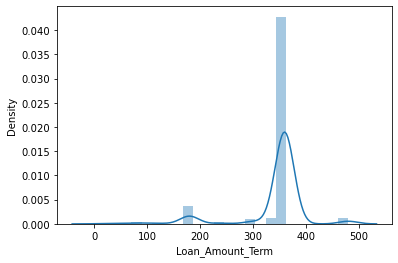

In [81]:
plt.plot()
sns.distplot(df['Loan_Amount_Term'])
plt.show()

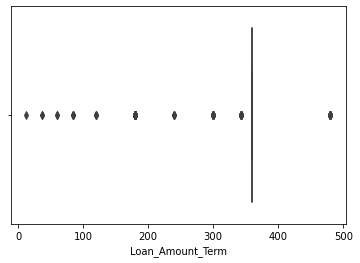

In [82]:
plt.plot()
sns.boxplot(df['Loan_Amount_Term'])
plt.show()

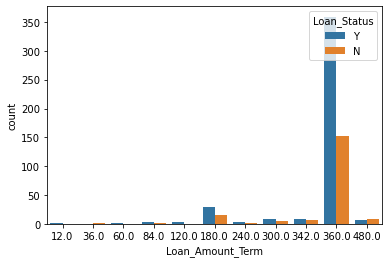

In [83]:
sns.countplot('Loan_Amount_Term',data=df,hue='Loan_Status');

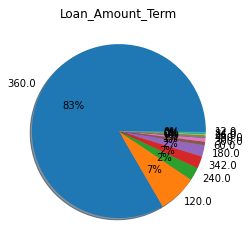

In [84]:
label=df['Loan_Amount_Term'].unique()
y=df['Loan_Amount_Term'].value_counts()

plt.title('Loan_Amount_Term')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

In [85]:
df["Loan_Amount_Term"] = labe.fit_transform(df[ 'Loan_Amount_Term'])

### Credit_History

In [86]:
df['Credit_History'].describe() 


count    614.000000
mean       0.855049
std        0.352339
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [87]:
df['Credit_History'].isnull().sum()

0

In [88]:
print(df['Credit_History'].unique())
print(df['Credit_History'].value_counts())

[1. 0.]
1.0    525
0.0     89
Name: Credit_History, dtype: int64


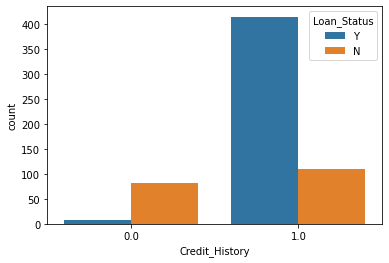

In [89]:
sns.countplot('Credit_History',data=df,hue='Loan_Status');

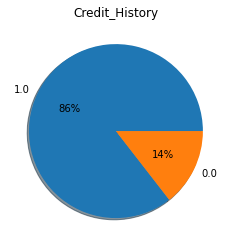

In [90]:
label=df['Credit_History'].unique()
y=df['Credit_History'].value_counts()

plt.title('Credit_History')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

### Property_Area

In [91]:
df['Property_Area'].describe() 

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object

In [92]:
df['Property_Area'].isnull().sum()

0

In [93]:
print(df['Property_Area'].unique())
print(df['Property_Area'].value_counts())

['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


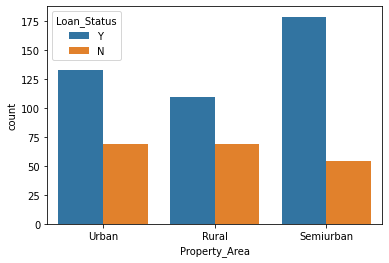

In [94]:
sns.countplot('Property_Area',data=df,hue='Loan_Status');

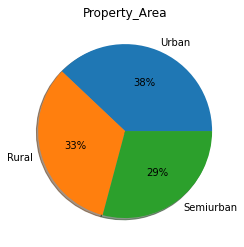

In [95]:
label=df['Property_Area'].unique()
y=df['Property_Area'].value_counts()

plt.title('Property_Area')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

In [96]:
df["Property_Area"] = labe.fit_transform(df[ 'Property_Area'])

### Loan_Status

In [97]:
df['Loan_Status'].describe() 

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

In [98]:
df['Loan_Status'].isnull().sum()

0

In [99]:
print(df['Loan_Status'].unique())
print(df['Loan_Status'].value_counts())

['Y' 'N']
Y    422
N    192
Name: Loan_Status, dtype: int64


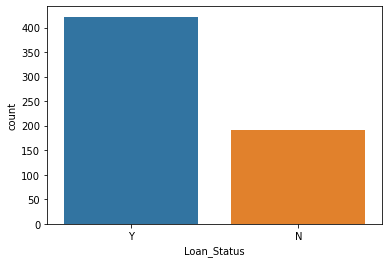

In [100]:
sns.countplot('Loan_Status',data=df);

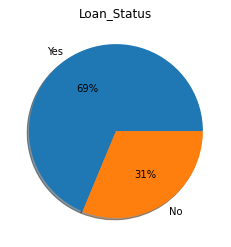

In [101]:
y=df['Loan_Status'].value_counts()
plt.title('Loan_Status')
plt.pie(y,labels=['Yes' ,'No'],autopct='%.0f%%',shadow=True)
plt.show()

In [102]:
df['Loan_Status']=df['Loan_Status'].replace('N',0)
df['Loan_Status']=df['Loan_Status'].replace('Y',1)


<br><font face = "TImes New Roman" size = "3"> <b> We will now check for the skew again after doong operation on each column 

In [103]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.479580
CoapplicantIncome   -0.145646
LoanAmount           1.314162
Loan_Amount_Term    -2.907201
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

<br><font face = "TImes New Roman" size = "3"> <b> Featuring and labelling our Target Variable 

In [104]:
f = df.drop (columns = ['Loan_Status'])
l = df['Loan_Status']

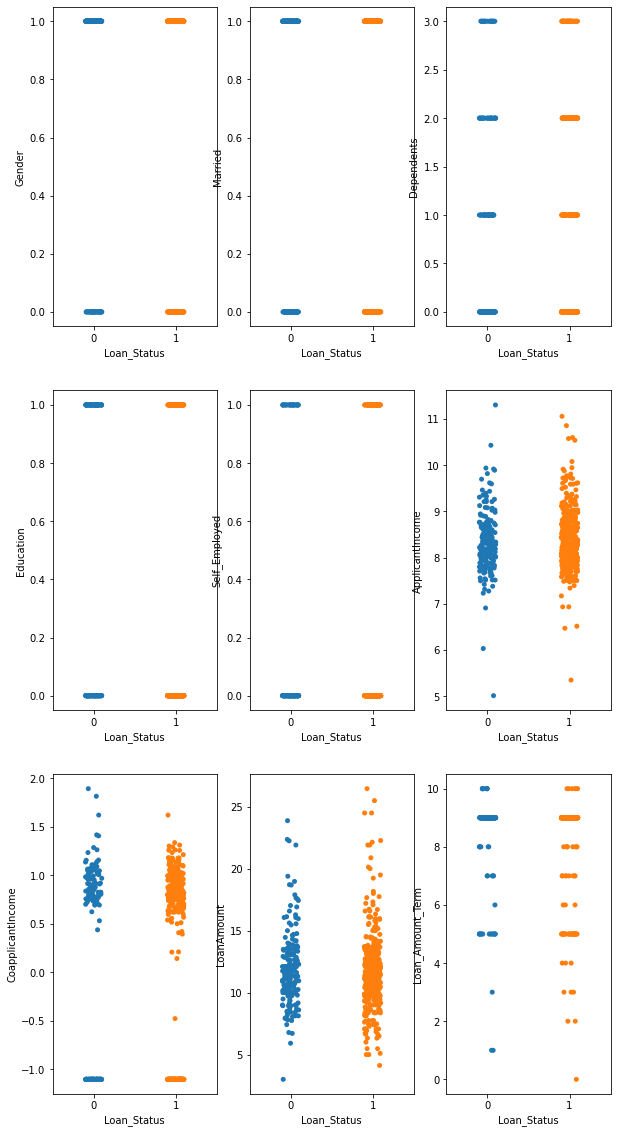

In [105]:
plt.figure(figsize=(10,20))
plotnumber = 1
for column in f:
    if plotnumber<=9 :
        ax = plt.subplot (3,3,plotnumber)
        sns.stripplot(l,f[column])
    plotnumber+=1
plt.show()

# 8) Correlation 

In [106]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
LoanAmount          -0.041984
Self_Employed       -0.003700
Loan_Amount_Term     0.002512
Dependents           0.010118
ApplicantIncome      0.010977
Gender               0.017987
Property_Area        0.032112
CoapplicantIncome    0.056869
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

<AxesSubplot:>

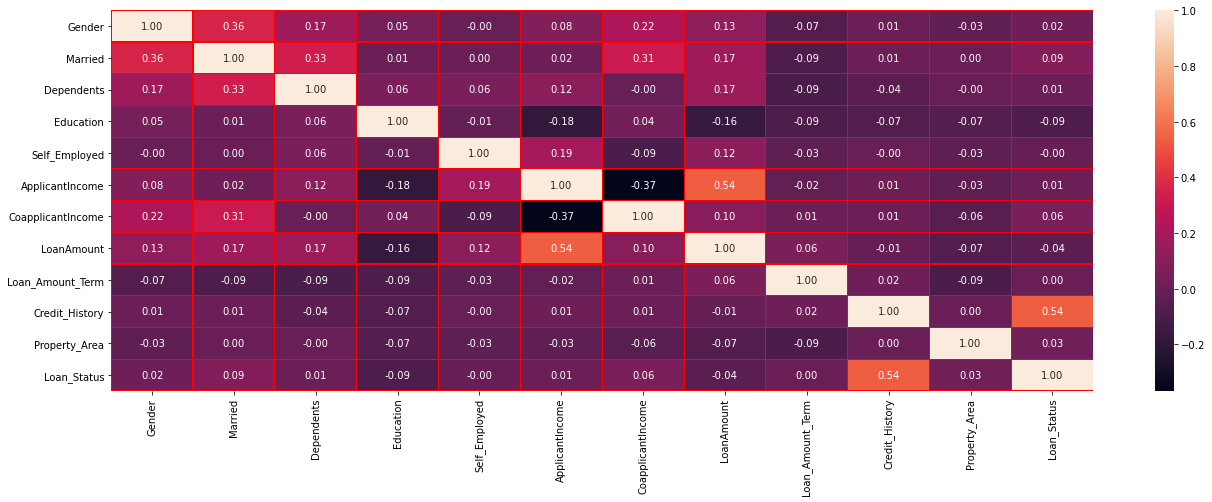

In [107]:
plt.figure(figsize=(22,7)) 
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

In [108]:
f.corrwith(l)

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome      0.010977
CoapplicantIncome    0.056869
LoanAmount          -0.041984
Loan_Amount_Term     0.002512
Credit_History       0.540556
Property_Area        0.032112
dtype: float64

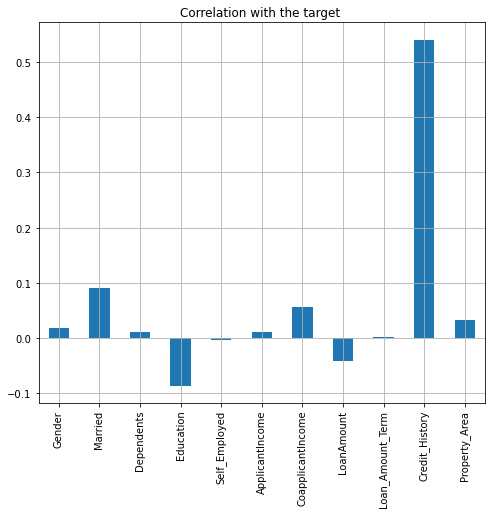

In [109]:
f.corrwith(l).plot(kind='bar',grid=True,figsize=(8,7), 
title='Correlation with the target ')
plt.show()

# 9) Variance Inflation Factor and Standard Scaler 

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scalar = StandardScaler()
f_scaled = scalar.fit_transform (f)

In [113]:
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (f_scaled, i) for i in range (f_scaled.shape[1])]
vif["Features"] = f. columns
vif

,vif,Features
0,1.206454,Gender
1,1.388767,Married
2,1.180442,Dependents
3,1.072773,Education
4,1.042282,Self_Employed
5,1.986798,ApplicantIncome
6,1.552945,CoapplicantIncome
7,1.704011,LoanAmount
8,1.043323,Loan_Amount_Term
9,1.008514,Credit_History


# 10) Model Selection 

The data has inconsistent amount of samples. high to low or vice versa so we will split the data into train and test set on the scaled dataset 
We will therefore first try the model with Logistic Regression model

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings ('ignore')
from sklearn.metrics import classification_report

In [115]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [116]:
lg=LogisticRegression()
gbc=GradientBoostingClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
svc=SVC()
abc=AdaBoostClassifier()


In [117]:
model_list=[lg,gnb,dtc,knc,svc,rfc,gbc,abc]

In [118]:
#Logistic Regression 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='RdYlGn', square=True)
    plt.xlabel("predicted")
    plt.show()

In [119]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score :',maxacc,'Maximum Random Number :',maxrn)

Accuracy score : 0.8651162790697674 Maximum Random Number : 8


accuracy_score:- 0.8651162790697674
              precision    recall  f1-score   support

           0       0.53      0.97      0.69        33
           1       0.99      0.85      0.91       182

    accuracy                           0.87       215
   macro avg       0.76      0.91      0.80       215
weighted avg       0.92      0.87      0.88       215



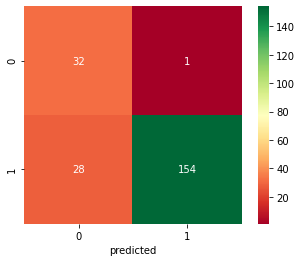

In [120]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=8)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

In [121]:
# Gradient Boosting Classifier 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Oranges', square=True)
    plt.xlabel("predicted")
    plt.show()

In [122]:

maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score :',maxacc,'Maximum Random Number :',maxrn)

Accuracy score : 0.8943089430894309 Maximum Random Number : 8


accuracy_score:- 0.8325581395348837
              precision    recall  f1-score   support

           0       0.57      0.77      0.65        44
           1       0.94      0.85      0.89       171

    accuracy                           0.83       215
   macro avg       0.75      0.81      0.77       215
weighted avg       0.86      0.83      0.84       215



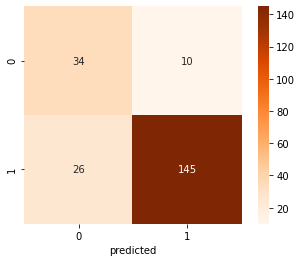

In [123]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=8)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()


In [124]:
# Decision Tree Classifier 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='viridis', square=True)
    plt.xlabel("predicted")
    plt.show()

In [125]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score :',maxacc,'Maximum Random Number :',maxrn)

Accuracy score : 0.8093023255813954 Maximum Random Number : 11


accuracy_score:- 0.8186046511627907
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        62
           1       0.89      0.85      0.87       153

    accuracy                           0.82       215
   macro avg       0.78      0.80      0.79       215
weighted avg       0.83      0.82      0.82       215



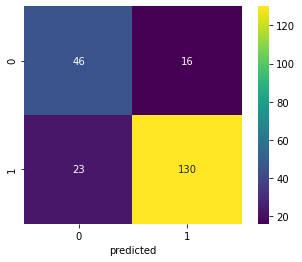

In [126]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=11)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

In [127]:
#KNeighbours Classifer 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='YlOrBr', square=True)
    plt.xlabel("predicted")
    plt.show()

In [128]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score :',maxacc,'Maximum Random Number :',maxrn)

Accuracy score : 0.8861788617886179 Maximum Random Number : 8


accuracy_score:- 0.7804878048780488
              precision    recall  f1-score   support

           0       0.46      0.71      0.56        24
           1       0.92      0.80      0.85        99

    accuracy                           0.78       123
   macro avg       0.69      0.75      0.71       123
weighted avg       0.83      0.78      0.80       123



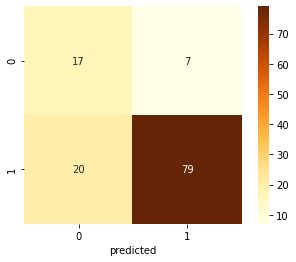

In [129]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=17)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

In [130]:
#Support Vector Classifier 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='icefire', square=True)
    plt.xlabel("predicted")
    plt.show()

In [131]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score : ',maxacc,'Maximum Random Number : ',maxrn)


Accuracy score :  0.8861788617886179 Maximum Random Number :  8


accuracy_score:- 0.8211382113821138
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        11
           1       1.00      0.80      0.89       112

    accuracy                           0.82       123
   macro avg       0.67      0.90      0.70       123
weighted avg       0.94      0.82      0.86       123



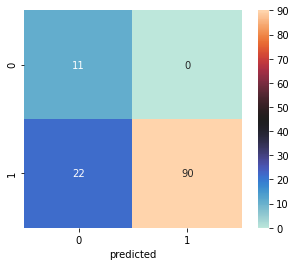

In [132]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=35)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()

In [133]:
#Random Forest Classifer 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='PiYG', square=True)
    plt.xlabel("predicted")
    plt.show()

In [134]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score :',maxacc,'Maximum Random Number :',maxrn)


Accuracy score : 0.8780487804878049 Maximum Random Number : 19


accuracy_score:- 0.8048780487804879
              precision    recall  f1-score   support

           0       0.51      0.76      0.61        25
           1       0.93      0.82      0.87        98

    accuracy                           0.80       123
   macro avg       0.72      0.79      0.74       123
weighted avg       0.85      0.80      0.82       123



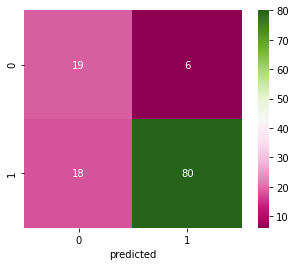

In [135]:

x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=17)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()


In [136]:
# Gradient Boosting Classifier 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='mako', square=True)
    plt.xlabel("predicted")
    plt.show()

In [137]:

maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score : ',maxacc,'Maximum Random Number :',maxrn)

Accuracy score :  0.8943089430894309 Maximum Random Number : 8


accuracy_score:- 0.827906976744186
              precision    recall  f1-score   support

           0       0.57      0.76      0.65        45
           1       0.93      0.85      0.89       170

    accuracy                           0.83       215
   macro avg       0.75      0.80      0.77       215
weighted avg       0.85      0.83      0.84       215



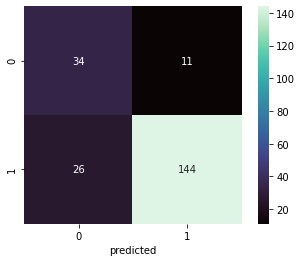

In [138]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=8)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()


In [139]:
#Ada Boost Classifier 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='crest', square=True)
    plt.xlabel("predicted")
    plt.show()

In [140]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.30,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score :',maxacc,'Maximum Random Number :',maxrn)

Accuracy score : 0.8432432432432433 Maximum Random Number : 13


accuracy_score:- 0.8432432432432433
              precision    recall  f1-score   support

           0       0.52      0.77      0.62        31
           1       0.95      0.86      0.90       154

    accuracy                           0.84       185
   macro avg       0.74      0.82      0.76       185
weighted avg       0.88      0.84      0.85       185



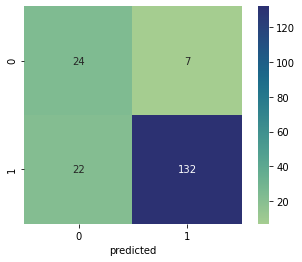

In [141]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.30,random_state=13)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

# 11) Cross Validation and Hyperparameter Tuning

In [142]:
for model in model_list:
    score=cross_val_score(model,f_scaled,l,cv=10)
    print(model)
    print(score)
    print(score.mean())

LogisticRegression()
[0.80645161 0.82258065 0.75806452 0.75806452 0.78688525 0.78688525
 0.86885246 0.85245902 0.80327869 0.83606557]
0.8079587519830775
GaussianNB()
[0.79032258 0.82258065 0.74193548 0.75806452 0.78688525 0.78688525
 0.86885246 0.83606557 0.80327869 0.83606557]
0.8030936012691697
DecisionTreeClassifier()
[0.75806452 0.67741935 0.69354839 0.74193548 0.68852459 0.75409836
 0.86885246 0.63934426 0.7704918  0.68852459]
0.7280803807509255
KNeighborsClassifier()
[0.77419355 0.82258065 0.75806452 0.74193548 0.75409836 0.72131148
 0.85245902 0.78688525 0.7704918  0.80327869]
0.7785298783712321
SVC()
[0.80645161 0.82258065 0.77419355 0.75806452 0.78688525 0.78688525
 0.85245902 0.85245902 0.80327869 0.83606557]
0.8079323109465891
RandomForestClassifier()
[0.80645161 0.77419355 0.77419355 0.74193548 0.7704918  0.7704918
 0.86885246 0.7704918  0.78688525 0.78688525]
0.7850872554204125
GradientBoostingClassifier()
[0.77419355 0.80645161 0.69354839 0.72580645 0.73770492 0.7704918
 

<br><font face = "TImes New Roman" size = "3"> <b> It can be confirmed from the above Cross Validation that Logistic Regression is the best model as it as the highest possible accuracy of all the other machine learning models. The random state with respect to other models is almost the same but it is well and truly confirmed from the cross validation that Logistic Regrssion is the best model. We will once again try and split the dataset to check again for the accuracy of this particular model below 

In [143]:
x_train,x_test,y_train,y_test= train_test_split(f_scaled, l, test_size= 0.35, random_state = 355)

In [144]:
log_reg = LogisticRegression ()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [145]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [146]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8186046511627907

In [147]:
def metric_score (clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict (x_train)
        print("\n==================Train Result======================")
        print (f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
    elif train==False:
        pred = clf.predict(x_test)
        print("\n====================Test Result=========================")
        print (f"Accuracy Score: {accuracy_score(y_test, pred)* 100:.2f}%")
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2)) 

In [148]:
#Training Score 
metric_score(log_reg,x_train,x_test, y_train, y_test, train=True) 

#Testing Score
metric_score(log_reg,x_train,x_test,y_train,y_test,train=False)


==================Train Result======================
Accuracy Score: 80.45%

====================Test Result=========================
Accuracy Score: 81.86%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.36      0.52        58
           1       0.81      0.99      0.89       157

    accuracy                           0.82       215
   macro avg       0.86      0.67      0.70       215
weighted avg       0.84      0.82      0.79       215



# 12) ROC Curve

In [149]:
fpr, tpr, thresholds = roc_curve (y_test, y_pred)

In [150]:
print ('Threshold Will Be =', thresholds)
print ('True Positive rate = ',tpr)
print ('False Positive rate = ',fpr)

Threshold Will Be = [2 1 0]
True Positive rate =  [0.         0.98726115 1.        ]
False Positive rate =  [0.         0.63793103 1.        ]


In [151]:
AUC = roc_auc_score (y_test,y_pred)
print (AUC)

0.6746650560070283


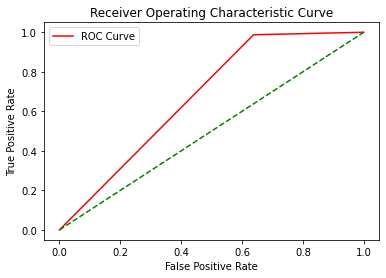

In [152]:
plt.plot(fpr, tpr, color='red', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='green', linestyle='--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()